In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import newton
from polimi.solvers import *

### Simple ODE

In [2]:
def f(t,y,F):
    #return -y + np.cos(2*np.pi*F*t)
    return -y + np.sin(2*np.pi*F*t)

### Analytical solution

In [3]:
def g(t,F,y0):
    w = 2*np.pi*F
    #return (y0-1./(1+w**2))*np.exp(-t) + 1./(1+w**2)*(np.cos(w*t)+w*np.sin(w*t))
    return (y0-1./(1+w**2))*np.exp(-t) + 1./(1+w**2)*(np.sin(w*t)-w*np.cos(w*t))

In [4]:
F = 1.
T = 1./F
tend = 10.*T
dt = T/1000.
print('tend = %g, dt = %g' % (tend,dt))
t = np.arange(0,tend,dt)
y0 = np.array([1])
sol = g(t,F,y0[0])

tend = 10, dt = 0.001


### BDF solver

In [5]:
ref = solve_ivp(lambda t,y: f(t,y,F),[0,tend],y0,method='BDF',t_eval=t)

In [10]:
pc = bdf(lambda t,y: f(t,y,F),[0,tend],y0,dt,3)

### Forward Euler

In [11]:
# n_steps = len(t)
# y_f = np.zeros(n_steps)
# y_f[0] = y0[0]
# for i in range(1,n_steps):
#     y_f[i] = y_f[i-1] + dt*f(t[i-1],y_f[i-1],F)
fw = forward_euler(lambda t,y: f(t,y,F),[0,tend],y0,dt)

### Backward Euler

In [12]:
# y_b = np.zeros(n_steps)
# y_b[0] = y0[0]
# for i in range(1,n_steps):
#     y_next = newton(lambda y: y-y_b[i-1]-dt*f(t[i],y,F), y_b[i-1], tol=1e-6, maxiter=50)
#     y_b[i] = y_b[i-1] + dt*f(t[i],y_next,F)
bw = backward_euler(lambda t,y: f(t,y,F),[0,tend],y0,dt)

> /Users/daniele/PoliMi/Research/Numerical_integration/polimi/solvers.py(27)backward_euler()
     26             ipdb.set_trace()
---> 27         y[:,i] = y[:,i-1] + h*fun(t[i],y_next)
     28     return {'t': t, 'y': y}

ipdb> q


BdbQuit: 

### Plot results

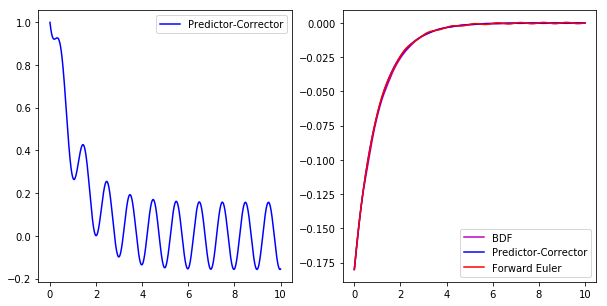

In [14]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
#plt.plot(t,sol,'k',lw=3,label='Solution')
#plt.plot(t,ref['y'][0],'m',label='BDF')
plt.plot(pc['t'],pc['y'][0],'b',label='Predictor-Corrector')
#plt.plot(fw['t'],fw['y'][0],'r',label='Forward Euler')
# plt.plot(bw['t'],bw['y'][0],'y',label='Backward Euler')
plt.legend(loc='best')
#plt.axis([5,6,-0.2,0.2])
plt.subplot(1,2,2)
plt.plot(t,sol-ref['y'][0],'m',label='BDF')
plt.plot(pc['t'],sol-pc['y'][0],'b',label='Predictor-Corrector')
plt.plot(fw['t'],sol-fw['y'][0],'r',label='Forward Euler')
# plt.plot(bw['t'],sol-bw['y'][0],'y',label='Backward Euler')
plt.legend(loc='best')
plt.show()